<a href="https://colab.research.google.com/github/MrVeidt/Prova-01-Data-Science/blob/main/Prova1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [1]:
import numpy as np 
import pandas as pd
from datetime import datetime
import matplotlib.pyplot as plt 
import seaborn as sns 

In [2]:
paiseslatam = ['Brazil', 'Colombia', 'Argentina', 'Peru', 'Chile', 'Ecuador', 'Bolivia', 'Paraguay', 'Uruguay', 'Suriname']
paisesasia = ['Afghanistan', 'Armenia', 'China', 'India', 'Vietnam', 'Bangladesh', 'Japan', 'Lebanon', 'Turkey']
paiseseuropa = ['United Kingdom', 'France', 'Spain', 'Netherlands', 'Belgium', 'Portugal', 'Ireland', 'Luxembourg', 'Andorra', 'Monaco']
paisesnorteamerica = ['Canada', 'Cuba', 'Honduras', 'Mexico', 'United States', 'Jamaica', 'Costa Rica', 'Barbados', 'Guatemala', 'Dominican Republic']

In [3]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Cópia de Indicators.csv')

df.head()

,CountryName,CountryCode,IndicatorName,IndicatorCode,Year,Value
0,Arab World,ARB,"Adolescent fertility rate (births per 1,000 wo...",SP.ADO.TFRT,1960,1.335609e+02
1,Arab World,ARB,Age dependency ratio (% of working-age populat...,SP.POP.DPND,1960,8.779760e+01
2,Arab World,ARB,"Age dependency ratio, old (% of working-age po...",SP.POP.DPND.OL,1960,6.634579e+00
3,Arab World,ARB,"Age dependency ratio, young (% of working-age ...",SP.POP.DPND.YG,1960,8.102333e+01
4,Arab World,ARB,Arms exports (SIPRI trend indicator values),MS.MIL.XPRT.KD,1960,3.000000e+06


In [ ]:
pd.set_option('display.max_rows', df.shape[0]+1)
print(df.IndicatorName.unique())

In [6]:
indicadores_pivot = pd.pivot_table(df, values='Value', columns='IndicatorName', index=['CountryName'])
pd.set_option('display.max_rows', df.shape[0]+1)
print(df)

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



##Qual o país dentre China, Estados Unidos, Portugal, Espanha, Brasil, Cuba, Argentina e Vietnã que tem a melhor relação entre 'Access to electricity, rural (% of rural population)' X 'Access to electricity, urban (% of urban population)'

In [ ]:
paises1 = ['China', 'United States', 'Cuba', 'Portugal', 'Spain', 'Vietnam', 'Brazil', 'Argentina']

In [ ]:
eletricidade_rural = df[(df['IndicatorName'] == 'Access to electricity, rural (% of rural population)') & (df['CountryName'].isin(paises1))]

In [ ]:
eletricidade_urbana = df[(df['IndicatorName'] == 'Access to electricity, urban (% of urban population)')& (df['CountryName'].isin(paises1))]

In [ ]:
eletric_rural_urbana = pd.DataFrame(data={'eletric_rural':eletricidade_rural.groupby(['CountryName']).Value.mean(),'eletric_urbana':eletricidade_urbana.groupby(['CountryName']).Value.mean(),'rural/urbana':eletricidade_rural.groupby(['CountryName']).Value.mean()/eletricidade_urbana.groupby(['CountryName']).Value.mean()})

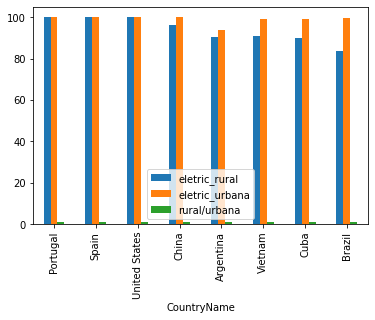

In [ ]:
eletric_rural_urbana.sort_values('rural/urbana',ascending=False).plot.bar()

##A diferença entre as jovens (Youth literacy rate, population 15-24 years, female (%)) e os jovens (Youth literacy rate, population 15-24 years, male (%)) nos seguintes países: Colombia, Chile, India, Vietnam, United Kingdom, Netherlands, Mexico, Canada

In [ ]:
paises2 = ['Colombia', 'Chile', 'India', 'Vietnam', 'United Kingdom', 'Netherlands', 'Mexico', 'Canada']

In [ ]:
alfabe_masc = df[(df['IndicatorName'] == 'Youth literacy rate, population 15-24 years, male (%)') & (df['CountryName'].isin(paises2))]
alfabe_fem = df[(df['IndicatorName'] == 'Youth literacy rate, population 15-24 years, female (%)')& (df['CountryName'].isin(paises2))]

alfabeta = pd.DataFrame(data={'alfabe_masc':alfabe_masc.groupby(['CountryName']).Value.mean(),'alfabe_fem':alfabe_fem.groupby(['CountryName']).Value.mean(),'masculina/feminina':alfabe_masc.groupby(['CountryName']).Value.mean()/alfabe_fem.groupby(['CountryName']).Value.mean()})

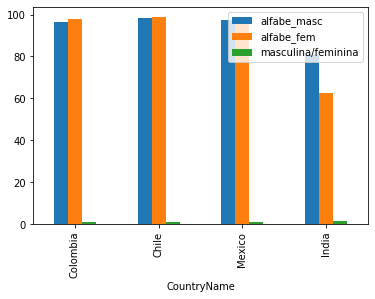

In [ ]:
alfabeta.sort_values('masculina/feminina',ascending=True).plot.bar()

##Comparação entre importação (Commercial service imports (current US\$)) e exportação de serviços comerciais (Commercial service exports (current US$)), entre Brasil X Argentina, China X Japão, Canada X Estados Unidos, Reino Unido X França.

In [ ]:
impolatam = df[(df['IndicatorName'] == 'Commercial service imports (current US$)') & (df['CountryName'].isin(['Brazil','Argentina']))]
expolatam = df[(df['IndicatorName'] == 'Commercial service exports (current US$)') & (df['CountryName'].isin(['Brazil','Argentina']))]
comlatam = pd.DataFrame(data={'impolatam':impolatam.groupby(['CountryName']).Value.mean(),'expolatam':expolatam.groupby(['CountryName']).Value.mean()})

impoasia = df[(df['IndicatorName'] == 'Commercial service imports (current US$)') & (df['CountryName'].isin(['China','Japan']))]
expoasia = df[(df['IndicatorName'] == 'Commercial service exports (current US$)') & (df['CountryName'].isin(['China','Japan']))]
comasia = pd.DataFrame(data={'impoasia':impoasia.groupby(['CountryName']).Value.mean(),'expoasia':expoasia.groupby(['CountryName']).Value.mean()})

impoeuro = df[(df['IndicatorName'] == 'Commercial service imports (current US$)') & (df['CountryName'].isin(['United Kingdom','France']))]
expoeuro = df[(df['IndicatorName'] == 'Commercial service exports (current US$)') & (df['CountryName'].isin(['United Kingdom','France']))]
comeuro = pd.DataFrame(data={'impoeuro':impoeuro.groupby(['CountryName']).Value.mean(),'expoeuro':expoeuro.groupby(['CountryName']).Value.mean()})

imponam = df[(df['IndicatorName'] == 'Commercial service imports (current US$)') & (df['CountryName'].isin(['United States','Canada']))]
exponam = df[(df['IndicatorName'] == 'Commercial service exports (current US$)') & (df['CountryName'].isin(['United States','Canada']))]
comnam = pd.DataFrame(data={'imponam':imponam.groupby(['CountryName']).Value.mean(),'exponam':exponam.groupby(['CountryName']).Value.mean()})


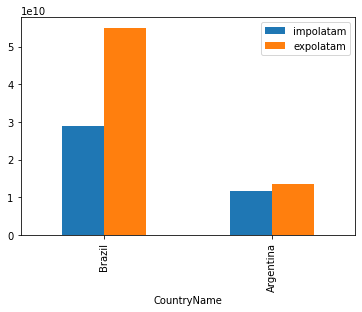

In [ ]:
comlatam.sort_values('impolatam',ascending=False).plot.bar()

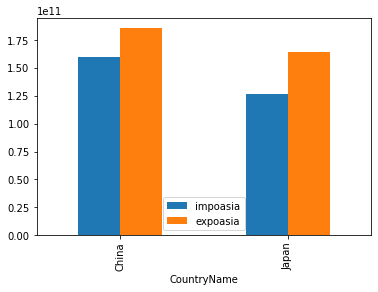

In [ ]:
comasia.sort_values('impoasia',ascending=False).plot.bar()

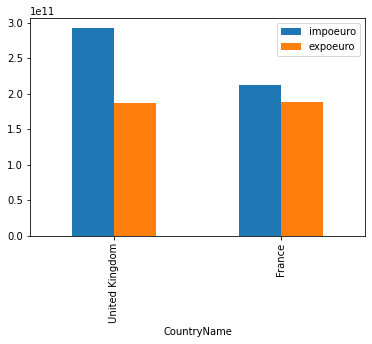

In [ ]:
comeuro.sort_values('impoeuro',ascending=False).plot.bar()

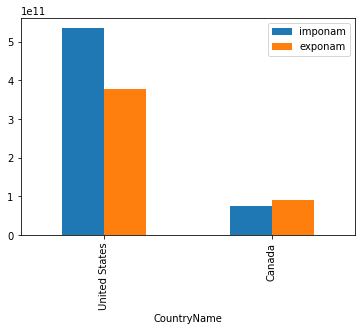

In [ ]:
comnam.sort_values('imponam',ascending=False).plot.bar()

##A razão entre o trabalho infantil (Children in employment, total (% of children ages 7-14)) e os empregados assalariados(Wage and salaried workers, total (% of total employed))

In [ ]:
paises3 = ['Afghanistan', 'Mexico', 'Jamaica', 'Belgium', 'Luxembourg', 'Bangladesh', 'Ecuador', 'Uruguay']

In [ ]:
trab_inf = df[(df['IndicatorName'] == 'Children in employment, total (% of children ages 7-14)') & (df['CountryName'].isin(paises3))]
salario = df[(df['IndicatorName'] == 'Wage and salaried workers, total (% of total employed)') & (df['CountryName'].isin(paises3))]

trab_inf_salario = pd.DataFrame(data={'trab_inf':trab_inf.groupby(['CountryName']).Value.mean(),'salario':salario.groupby(['CountryName']).Value.mean(),'trabalho_infantil/salario':trab_inf.groupby(['CountryName']).Value.mean()/salario.groupby(['CountryName']).Value.mean()})

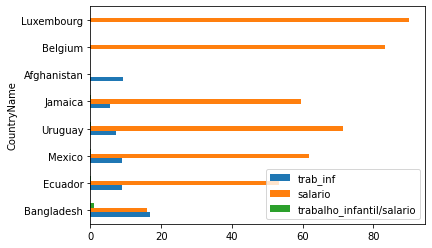

In [ ]:
trab_inf_salario.sort_values('trabalho_infantil/salario',ascending=False).plot.barh()

##A relação entre o PIB per capta (GDP per capita, PPP (current international $)) e a população urbana (Urban population)

In [ ]:
paises4 = ['Afghanistan', 'Honduras', 'Jamaica', 'Ireland', 'Luxembourg', 'Lebanon', 'Paraguay', 'Uruguay']

In [ ]:
gdp = df[(df['IndicatorName'] == 'GDP per capita, PPP (current international $)') & (df['CountryName'].isin(paises4))]
upopulation = df[(df['IndicatorName'] == 'Urban population') & (df['CountryName'].isin(paises4))]

gdp_per_urban = pd.DataFrame(data={'gdp':gdp.groupby(['CountryName']).Value.mean(),'upopulation':upopulation.groupby(['CountryName']).Value.mean(),'gdp/urban_population':gdp.groupby(['CountryName']).Value.mean()/salario.groupby(['CountryName']).Value.mean()})

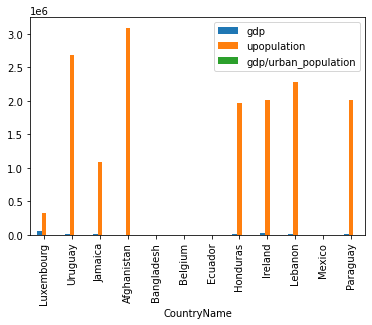

In [ ]:
gdp_per_urban.sort_values('gdp/urban_population',ascending=False).plot.bar()

##A razão entre o trabalho precarizado (Vulnerable employment, total (% of total employment)) e o PIB per capta (GDP per capita, PPP (current international $))

In [ ]:
paises5 = ['Afghanistan', 'Honduras', 'Jamaica', 'Ireland', 'Luxembourg', 'Lebanon', 'Paraguay', 'Uruguay']

In [ ]:
trab_prec = df[(df['IndicatorName'] == 'Vulnerable employment, total (% of total employment)') & (df['CountryName'].isin(paises5))]
gdp = df[(df['IndicatorName'] == 'GDP per capita, PPP (current international $)') & (df['CountryName'].isin(paises5))]

gdp_trab_prec = pd.DataFrame(data={'gdp':gdp.groupby(['CountryName']).Value.mean(),'trab_prec':trab_prec.groupby(['CountryName']).Value.mean(),'gdp/trab_prec':gdp.groupby(['CountryName']).Value.mean()/trab_prec.groupby(['CountryName']).Value.mean()})

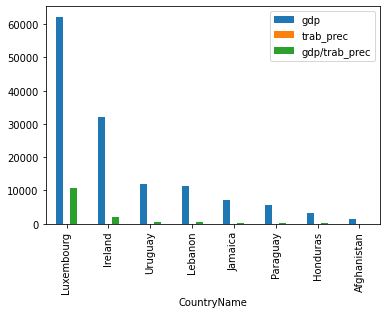

In [ ]:
gdp_trab_prec.sort_values('gdp/trab_prec',ascending=False).plot.bar()

##Qual dos seguintes países tem a melhor relação entre investimento nas escolas (Adjusted savings: education expenditure (current US$)) e dos empregados assalariados (Wage and salaried workers, total (% of total employed))

In [7]:
paises6 = ['Armenia', 'Costa Rica', 'Barbados', 'Monaco', 'Andorra', 'Vietnam', 'Colombia', 'Peru']

In [8]:
edu_exp = df[(df['IndicatorName'] == 'Adjusted savings: education expenditure (current US$)') & (df['CountryName'].isin(paises6))]
salario = df[(df['IndicatorName'] == 'Wage and salaried workers, total (% of total employed)') & (df['CountryName'].isin(paises6))]

edu_exp_salario = pd.DataFrame(data={'edu_exp':edu_exp.groupby(['CountryName']).Value.mean(),'salario':salario.groupby(['CountryName']).Value.mean(),'gasto_educacional/salario':edu_exp.groupby(['CountryName']).Value.mean()/salario.groupby(['CountryName']).Value.mean()})

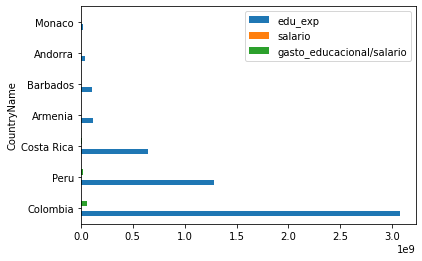

In [10]:
edu_exp_salario.sort_values('gasto_educacional/salario',ascending=False).plot.barh()

##Há relação entre a acessibilidade de eletricidade em áreas rurais(Access to electricity, rural (% of rural population)) e a alfabetização feminina(Youth literacy rate, population 15-24 years, female (%))?

In [16]:
paises7 = ['Armenia', 'Costa Rica', 'Honduras', 'Portugal', 'Ireland', 'Turkey', 'Chile', 'Ecuador']

In [17]:
eletricidade_rural = df[(df['IndicatorName'] == 'Access to electricity, rural (% of rural population)') & (df['CountryName'].isin(paises7))]
alfabe_fem = df[(df['IndicatorName'] == 'Youth literacy rate, population 15-24 years, female (%)')& (df['CountryName'].isin(paises7))]

alfa_eletro = pd.DataFrame(data={'eletricidade_rural':eletricidade_rural.groupby(['CountryName']).Value.mean(),'alfabe_fem':alfabe_fem.groupby(['CountryName']).Value.mean(),'eletro_rural/alfabe_feminina':eletricidade_rural.groupby(['CountryName']).Value.mean()/alfabe_fem.groupby(['CountryName']).Value.mean()})

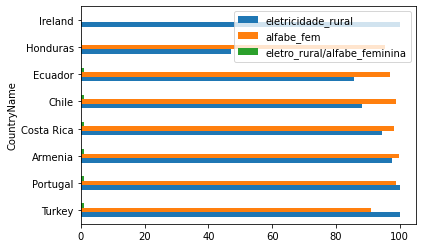

In [19]:
alfa_eletro.sort_values('eletro_rural/alfabe_feminina',ascending=False).plot.barh()

##A razão entre o trabalho infantil (Children in employment, total (% of children ages 7-14)) e o PIB per Capta (GDP per capita, PPP (current international $))

In [27]:
paises8 = ['Bangladesh', 'Costa Rica', 'Mexico', 'Spain', 'United Kingdom', 'India', 'Colombia', 'Paraguay']

In [28]:
trab_inf = df[(df['IndicatorName'] == 'Children in employment, total (% of children ages 7-14)') & (df['CountryName'].isin(paises8))]
gdp = df[(df['IndicatorName'] == 'GDP per capita, PPP (current international $)') & (df['CountryName'].isin(paises8))]

trab_inf_gdp = pd.DataFrame(data={'trabalho_inf':trab_inf.groupby(['CountryName']).Value.mean(),'pib_per_capta':gdp.groupby(['CountryName']).Value.mean(),'trabalho_inf/pib':trab_inf.groupby(['CountryName']).Value.mean()/gdp.groupby(['CountryName']).Value.mean()})

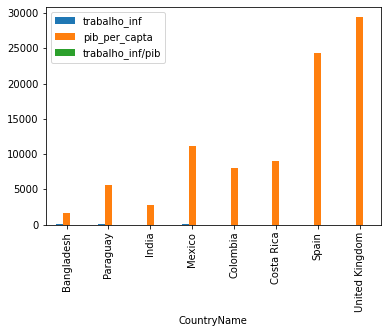

In [29]:
trab_inf_gdp.sort_values('trabalho_inf/pib',ascending=False).plot.bar()

##A relação entre a importação de serviços comerciais (Commercial service imports (current US$)) e a população urbana (Urban Population)

In [35]:
paises9 = ['Japan', 'Mexico', 'United States', 'France', 'United Kingdom', 'China', 'Brasil', 'Chile']

In [36]:
upopulation = df[(df['IndicatorName'] == 'Urban population') & (df['CountryName'].isin(paises9))]
imports = df[(df['IndicatorName'] == 'Commercial service imports (current US$)') & (df['CountryName'].isin(paises9))]

import_per_population = pd.DataFrame(data={'import':imports.groupby(['CountryName']).Value.mean(),'urban_population':upopulation.groupby(['CountryName']).Value.mean(),'população/importação':upopulation.groupby(['CountryName']).Value.mean()/imports.groupby(['CountryName']).Value.mean()})

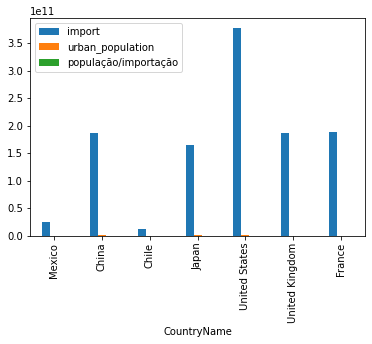

In [37]:
import_per_population.sort_values('população/importação',ascending=False).plot.bar()